# Projeto 3 - Fatores que mais influenciam na vitória de uma partida de LoL

** Nomes: ** <font color=blue> Jorge Ehrhardt</font>, <font color=blue> Vitor Liu </font>

## League of Legends é um videogame estilo MOBA (Multiplayer Online Battle Arena), cujo objetivo do jogador é, com o seu time, defender a sua base e destruir a base inimiga. No jogo, há variás relações entre variáveis que podem ser análisadas. As variáveis selecionadas para essa análise são: quantidade de dragons; quantidade de barons; quantidade de torres; quantidade de ouro em um dado momento; quantidade de mortes; tempo da destruição da primeira torre; tempo da morte do primeiro dragon; tempo de morte do primeiro baron; tempo total da partida; resultado do jogo.
## O e-sports de League of Legends tem se tornado cada vez mais popular em todo mundo. Com prêmios acima de 50,000.00 dólares, há ligas regionais em todos os continentes do mundo. Esse dataset contêm jogos da liga norte americana, européia, brasileira, taiwanesa e coreana, além dos campeonatos mundiais, de 2014 a 2017.
## Primeiramente, começaremos com um panorama geral de LoL como um e-sport. Então, analisaremos relações entre as variáveis a partir de regressões lineares e logísticas.

# 0 - Leitura do dataset e organização inicial

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy import stats
import statsmodels.api as sm
import ast
import warnings
warnings.filterwarnings('ignore')
from IPython.display import HTML

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
#Abrir o arquivo
df = pd.read_csv('LoL.csv')
#listar colunas
df.head()

,MatchHistory,League,Season,Year,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddle,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupportChamp,redSupport,goldredSupport,redBans
0,http://matchhistory.na.leagueoflegends.com/en/...,North_America,Spring_Season,2015,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Hai,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",Thresh,LemonNation,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']"
1,http://matchhistory.na.leagueoflegends.com/en/...,North_America,Spring_Season,2015,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,Shiphtur,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",Annie,KiWiKiD,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']"
2,http://matchhistory.na.leagueoflegends.com/en/...,North_America,Spring_Season,2015,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,Keane,Azir,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",Janna,BunnyFuFuu,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']"
3,http://matchhistory.na.leagueoflegends.com/en/...,North_America,Spring_Season,2015,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,Fenix,Lulu,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Janna,Xpecial,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']"
4,http://matchhistory.na.leagueoflegends.com/en/...,North_America,Spring_Season,2015,CLG,1,0,T8,35,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...",...,Slooshi8,Lulu,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Maplestreet8,Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Annie,Dodo8,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']"


In [4]:
#Considerar os playoffs como parte da season
df["Season"] = df["Season"].replace("Spring_Playoffs", "Spring_Season")
df["Season"] = df["Season"].replace("Summer_Playoffs", "Summer_Season")
df["Season"] = df["Season"].replace("Winter_Playoffs", "Winter_Season")
#Trabalhar apenas com a coluna "redTeamTag"
df["redTeamTag"] = df["redTeamTag"].astype("category")
df["redTeamTag"] = df["redTeamTag"].str.upper()
#Times que trocaram de nome
df["redTeamTag"] = df["redTeamTag"].replace("LONGZHU", "LW")
df["redTeamTag"] = df["redTeamTag"].replace("YOEFW", "FW")
df["redTeamTag"] = df["redTeamTag"].replace("VFK", "KST")
df["redTeamTag"] = df["redTeamTag"].replace("HKES", "HKE")
df["redTeamTag"] = df["redTeamTag"].replace("CJE", "CJ")
#df das ligas
df_cblol = df[df["League"] == "CBLOL"]
df_eu = df[df["League"] == "Europe"]
df_lck = df[df["League"] == "LCK"]
df_lms = df[df["League"] == "LMS"]
df_msi = df[df["League"] == "Mid-Season_Invitational"]
df_na = df[df["League"] == "North_America"]
df_w = df[df["League"] == "Season_World_Championship"]

ll = []

In [5]:
#df da Europa
df_eu15 = df_eu[df_eu["Year"] == 2015]
df_eu16 = df_eu[df_eu["Year"] == 2016]
df_eu17 = df_eu[df_eu["Year"] == 2017]
ll.append(df_eu15)
ll.append(df_eu16)
ll.append(df_eu17)
print("Total de jogos e total de cada ano (Europa):")
print("2015: {}" .format(len(df_eu15)))
print("2016: {}" .format(len(df_eu16)))
print("2017: {}" .format(len(df_eu17)))
print("Total: {}" .format(len(df_eu)))

Total de jogos e total de cada ano (Europa):
2015: 243
2016: 332
2017: 179
Total: 754


In [6]:
#df do Brasil
df_cblol15 = df_cblol[df_cblol["Year"] == 2015] #nulo
df_cblol16 = df_cblol[df_cblol["Year"] == 2016]
df_cblol17 = df_cblol[df_cblol["Year"] == 2017]
ll.append(df_cblol16)
ll.append(df_cblol17)
print("Total de jogos e total de cada ano (Brasil):")
print("2015: {}" .format(len(df_cblol15)))
print("2016: {}" .format(len(df_cblol16)))
print("2017: {}" .format(len(df_cblol17)))
print("Total: {}" .format(len(df_cblol)))

Total de jogos e total de cada ano (Brasil):
2015: 0
2016: 146
2017: 67
Total: 213


In [7]:
#df da Coreia
df_lck15 = df_lck[df_lck["Year"] == 2015]
df_lck16 = df_lck[df_lck["Year"] == 2016]
df_lck17 = df_lck[df_lck["Year"] == 2017]
ll.append(df_lck15)
ll.append(df_lck16)
ll.append(df_lck17)
print("Total de jogos e total de cada ano (Coreia):")
print("2015: {}" .format(len(df_lck15)))
print("2016: {}" .format(len(df_lck16)))
print("2017: {}" .format(len(df_lck17)))
print("Total: {}" .format(len(df_lck)))

Total de jogos e total de cada ano (Coreia):
2015: 379
2016: 467
2017: 255
Total: 1101


In [8]:
#df de Taiwan
df_lms["Year"].unique()
df_lms15 = df_lms[df_lms["Year"] == 2015]
df_lms16 = df_lms[df_lms["Year"] == 2016]
df_lms17 = df_lms[df_lms["Year"] == 2017]
ll.append(df_lms15)
ll.append(df_lms16)
ll.append(df_lms17)
print("Total de jogos e total de cada ano (Taiwan):")
print("2015: {}" .format(len(df_lms15)))
print("2016: {}" .format(len(df_lms16)))
print("2017: {}" .format(len(df_lms17)))
print("Total: {}" .format(len(df_lms)))

Total de jogos e total de cada ano (Taiwan):
2015: 197
2016: 231
2017: 112
Total: 540


In [9]:
#df da America do Norte
df_na15 = df_na[df_na["Year"] == 2015]
df_na16 = df_na[df_na["Year"] == 2016]
df_na17 = df_na[df_na["Year"] == 2017]
ll.append(df_na15)
ll.append(df_na16)
ll.append(df_na17)
print("Total de jogos e total de cada ano (NA):")
print("2015: {}" .format(len(df_na15)))
print("2016: {}" .format(len(df_na16)))
print("2017: {}" .format(len(df_na17)))
print("Total: {}" .format(len(df_na)))

Total de jogos e total de cada ano (NA):
2015: 245
2016: 365
2017: 245
Total: 855


In [10]:
#df do MSI
df_msi15 = df_msi[df_msi["Year"] == 2015]
df_msi16 = df_msi[df_msi["Year"] == 2016]
df_msi17 = df_msi[df_msi["Year"] == 2017]
ll.append(df_msi15)
ll.append(df_msi16)
ll.append(df_msi17)
print("Total de jogos e total de cada ano (MSI):")
print("2015: {}" .format(len(df_msi15)))
print("2016: {}" .format(len(df_msi16)))
print("2017: {}" .format(len(df_msi17)))
print("Total: {}" .format(len(df_msi)))

Total de jogos e total de cada ano (MSI):
2015: 28
2016: 41
2017: 42
Total: 111


In [11]:
#df do Worlds
df_w14 = df_w[df_w["Year"] == 2014]
df_w15 = df_w[df_w["Year"] == 2015]
df_w16 = df_w[df_w["Year"] == 2016]
df_w17 = df_w[df_w["Year"] == 2017]  #nulo
ll.append(df_w14)
ll.append(df_w15)
ll.append(df_w16)
print("Total de jogos e total de cada ano (Worlds):")
print("2014: {}" .format(len(df_w14)))
print("2015: {}" .format(len(df_w15)))
print("2016: {}" .format(len(df_w16)))
print("2017: {}" .format(len(df_w17)))
print("Total: {}" .format(len(df_w)))

Total de jogos e total de cada ano (Worlds):
2014: 78
2015: 73
2016: 77
2017: 0
Total: 228


# 1 - Dados gerais

## Quantidade de vitórias por lado

In [12]:
bwin = df["bResult"].value_counts()[0]
rwin = df["bResult"].value_counts()[1]
print("Vitórias time azul: {}" .format(bwin))
print("Vitórias time vermelho: {}" .format(rwin))

Vitórias time azul: 1729
Vitórias time vermelho: 2073


## Times e quantidades de jogos

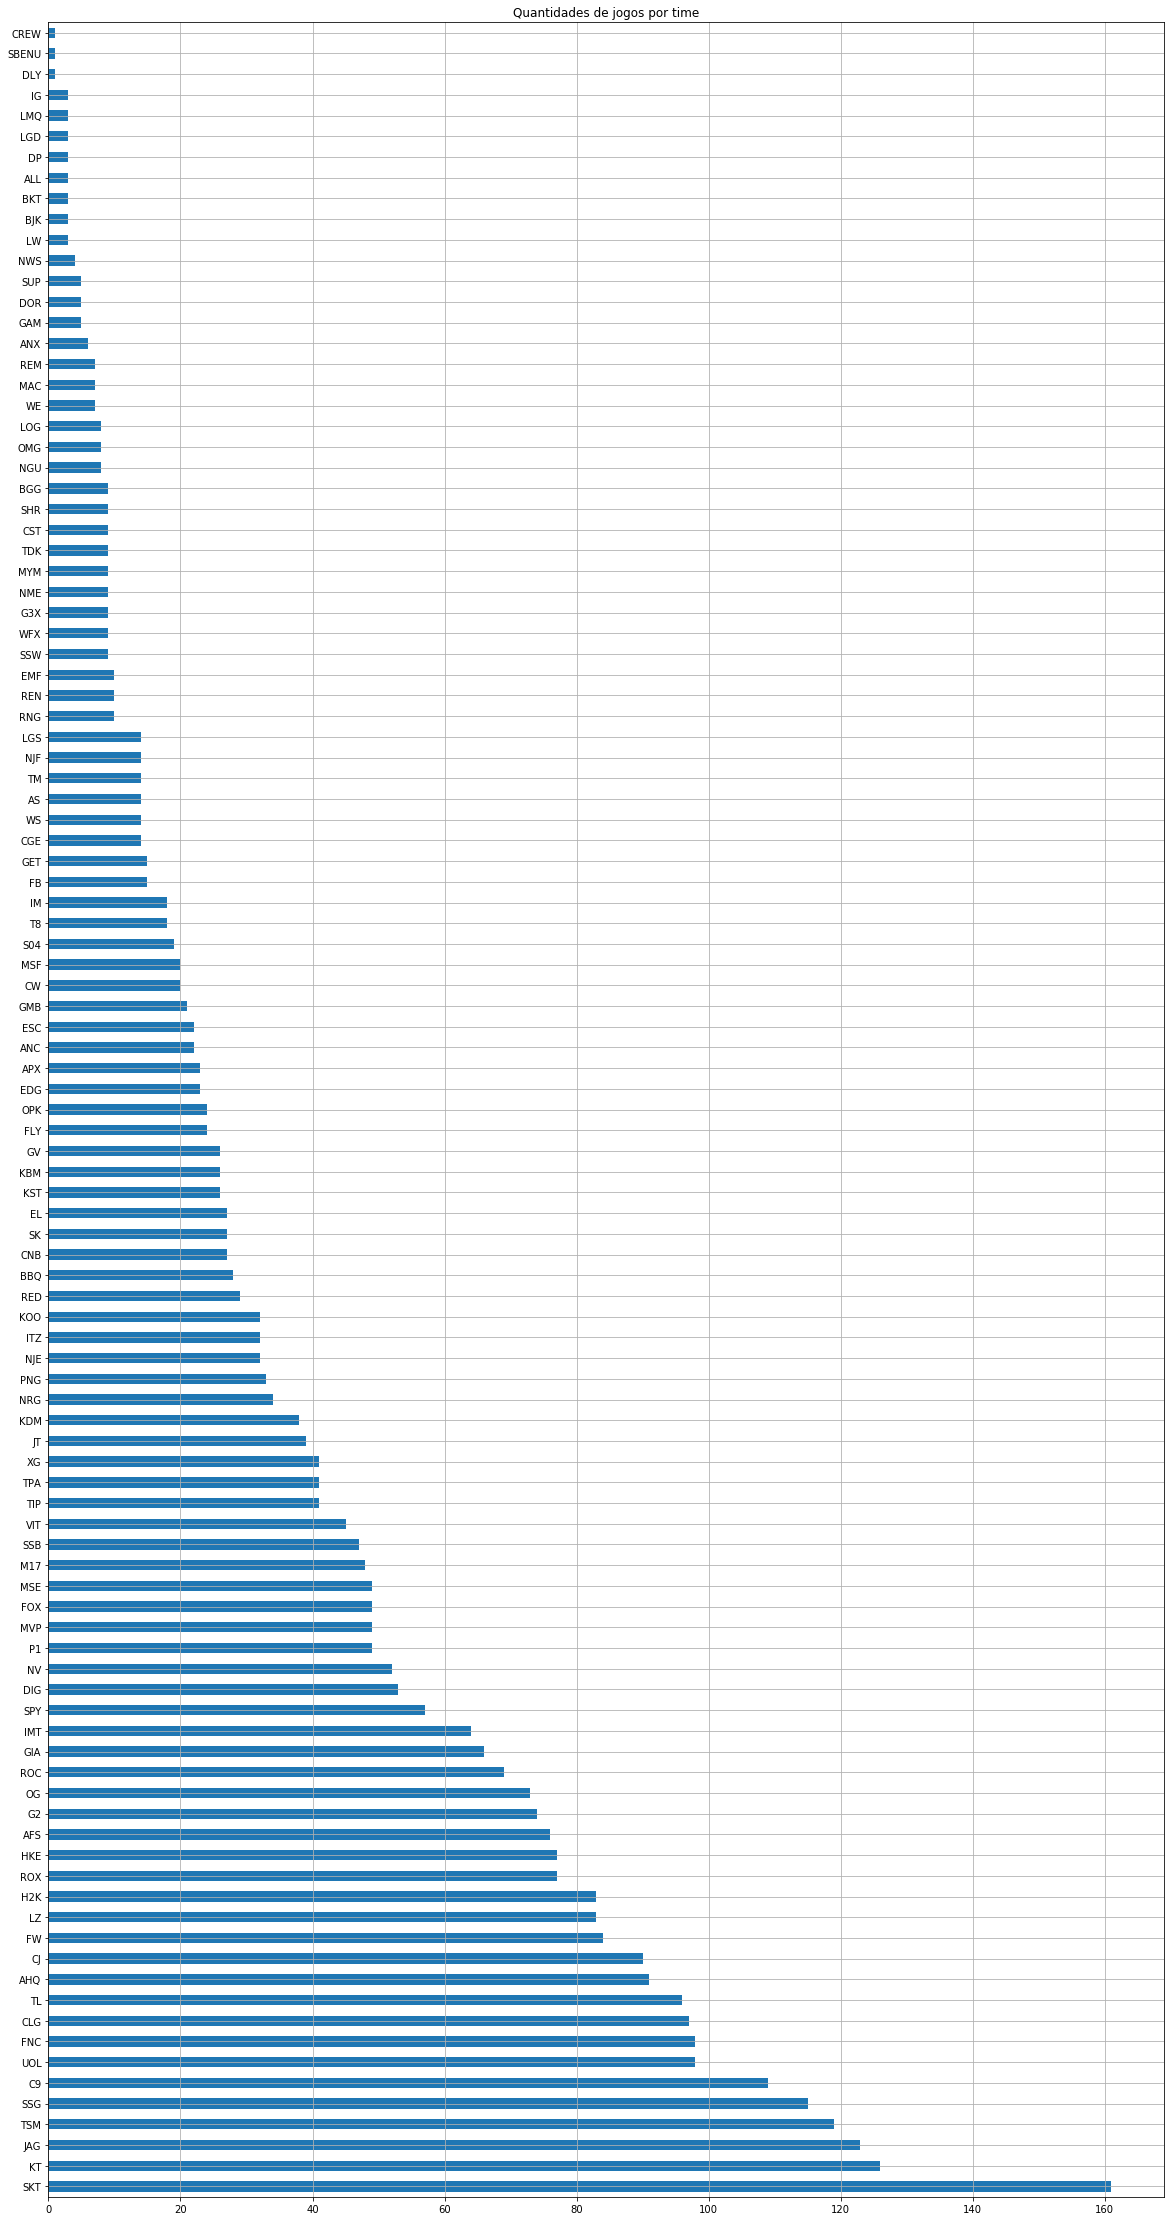

In [13]:
pd.value_counts(df["redTeamTag"].values, sort=True).plot.barh(figsize=(20,40), grid=True, title="Quantidades de jogos por time")

## Campeões e respectiva quantidade de picks

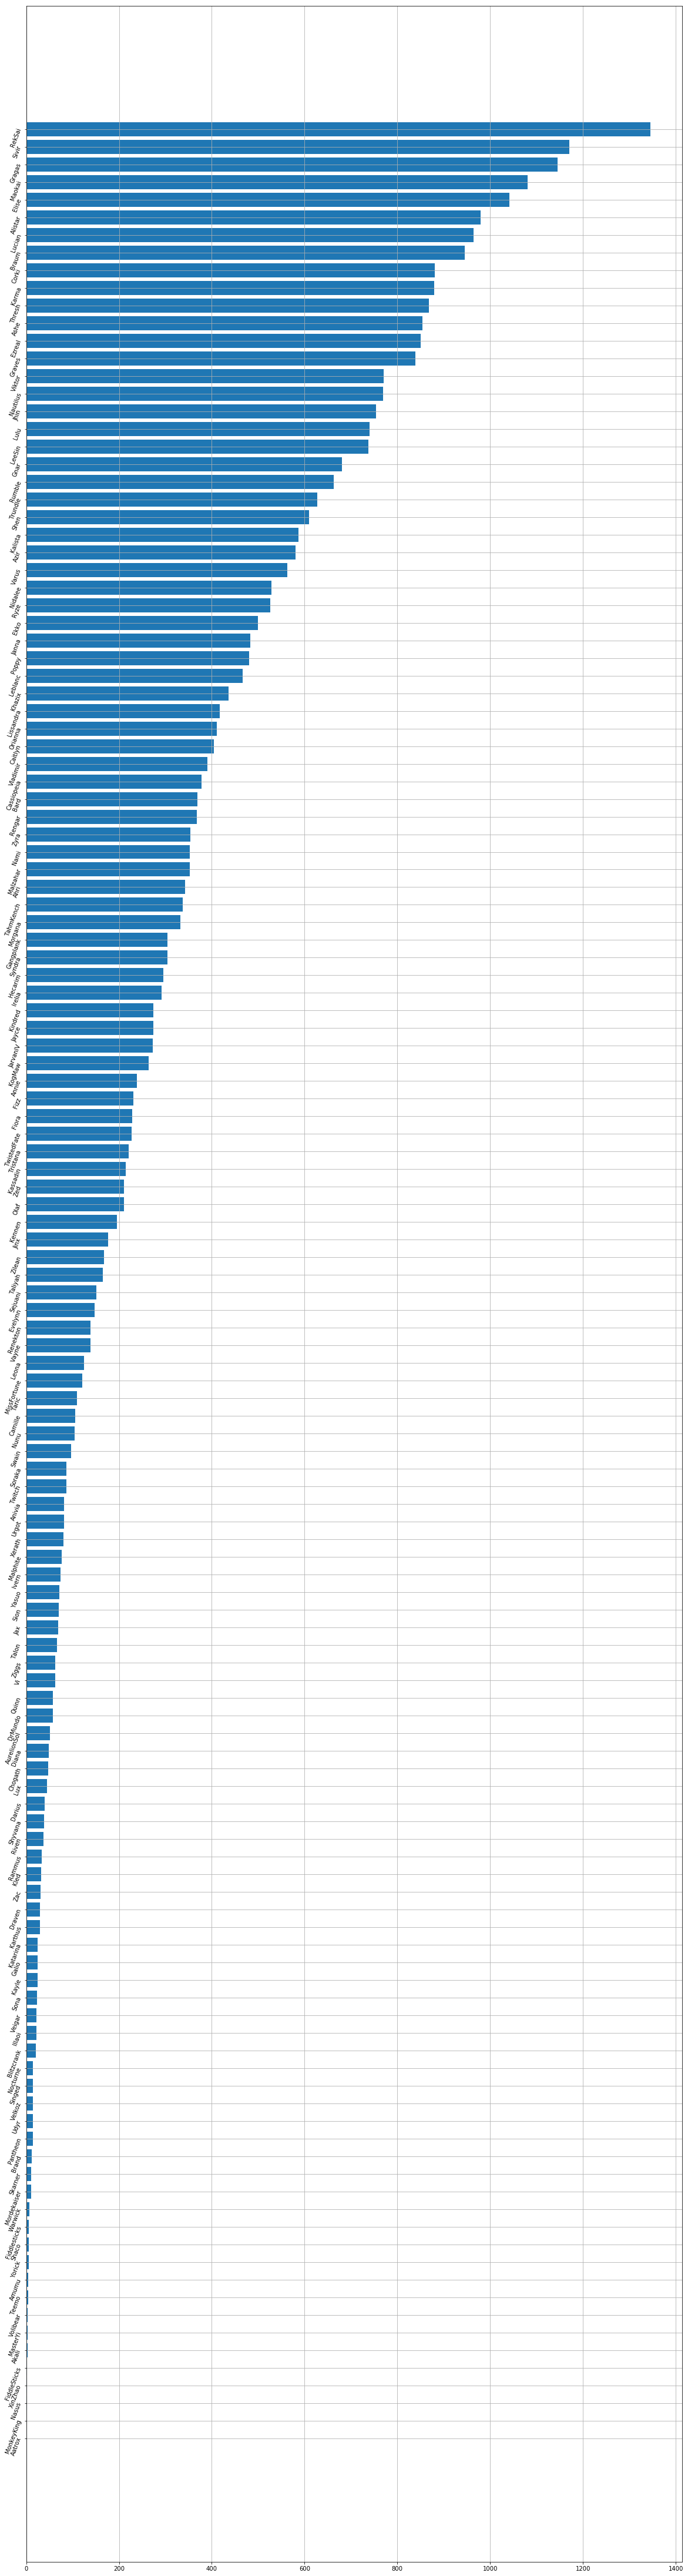

In [14]:
col = ["blueTopChamp", "blueJungleChamp", "blueMiddleChamp", "blueADCChamp", "blueSupportChamp", "redTopChamp", "redJungleChamp", "redMiddleChamp", "redADCChamp", "redSupportChamp"]
qpick = {}
for i in col:
    for j in df[i]:
        if j not in qpick:
            qpick[j] = 1
        else:
            qpick[j] += 1
            
import operator
qpick = sorted(qpick.items(), key=operator.itemgetter(1))
qpick

plt.figure(figsize=(20, 80))
plt.barh(range(len(qpick)), [val[1] for val in qpick], align='center')
plt.yticks(range(len(qpick)), [val[0] for val in qpick])
plt.yticks(rotation=70)
plt.grid()
plt.show()

## Times e quantidades de vitórias e derrotas

In [15]:
dic = {}
b = sorted(df["redTeamTag"].unique())

for i in b:
    if i not in dic:
        dic[i] = [0,0]
    for j in range(len(df)):
        if df["redTeamTag"][j] == i:
            if df["rResult"][j] == 1:
                dic[i][0] += 1
            else:
                dic[i][1] += 1

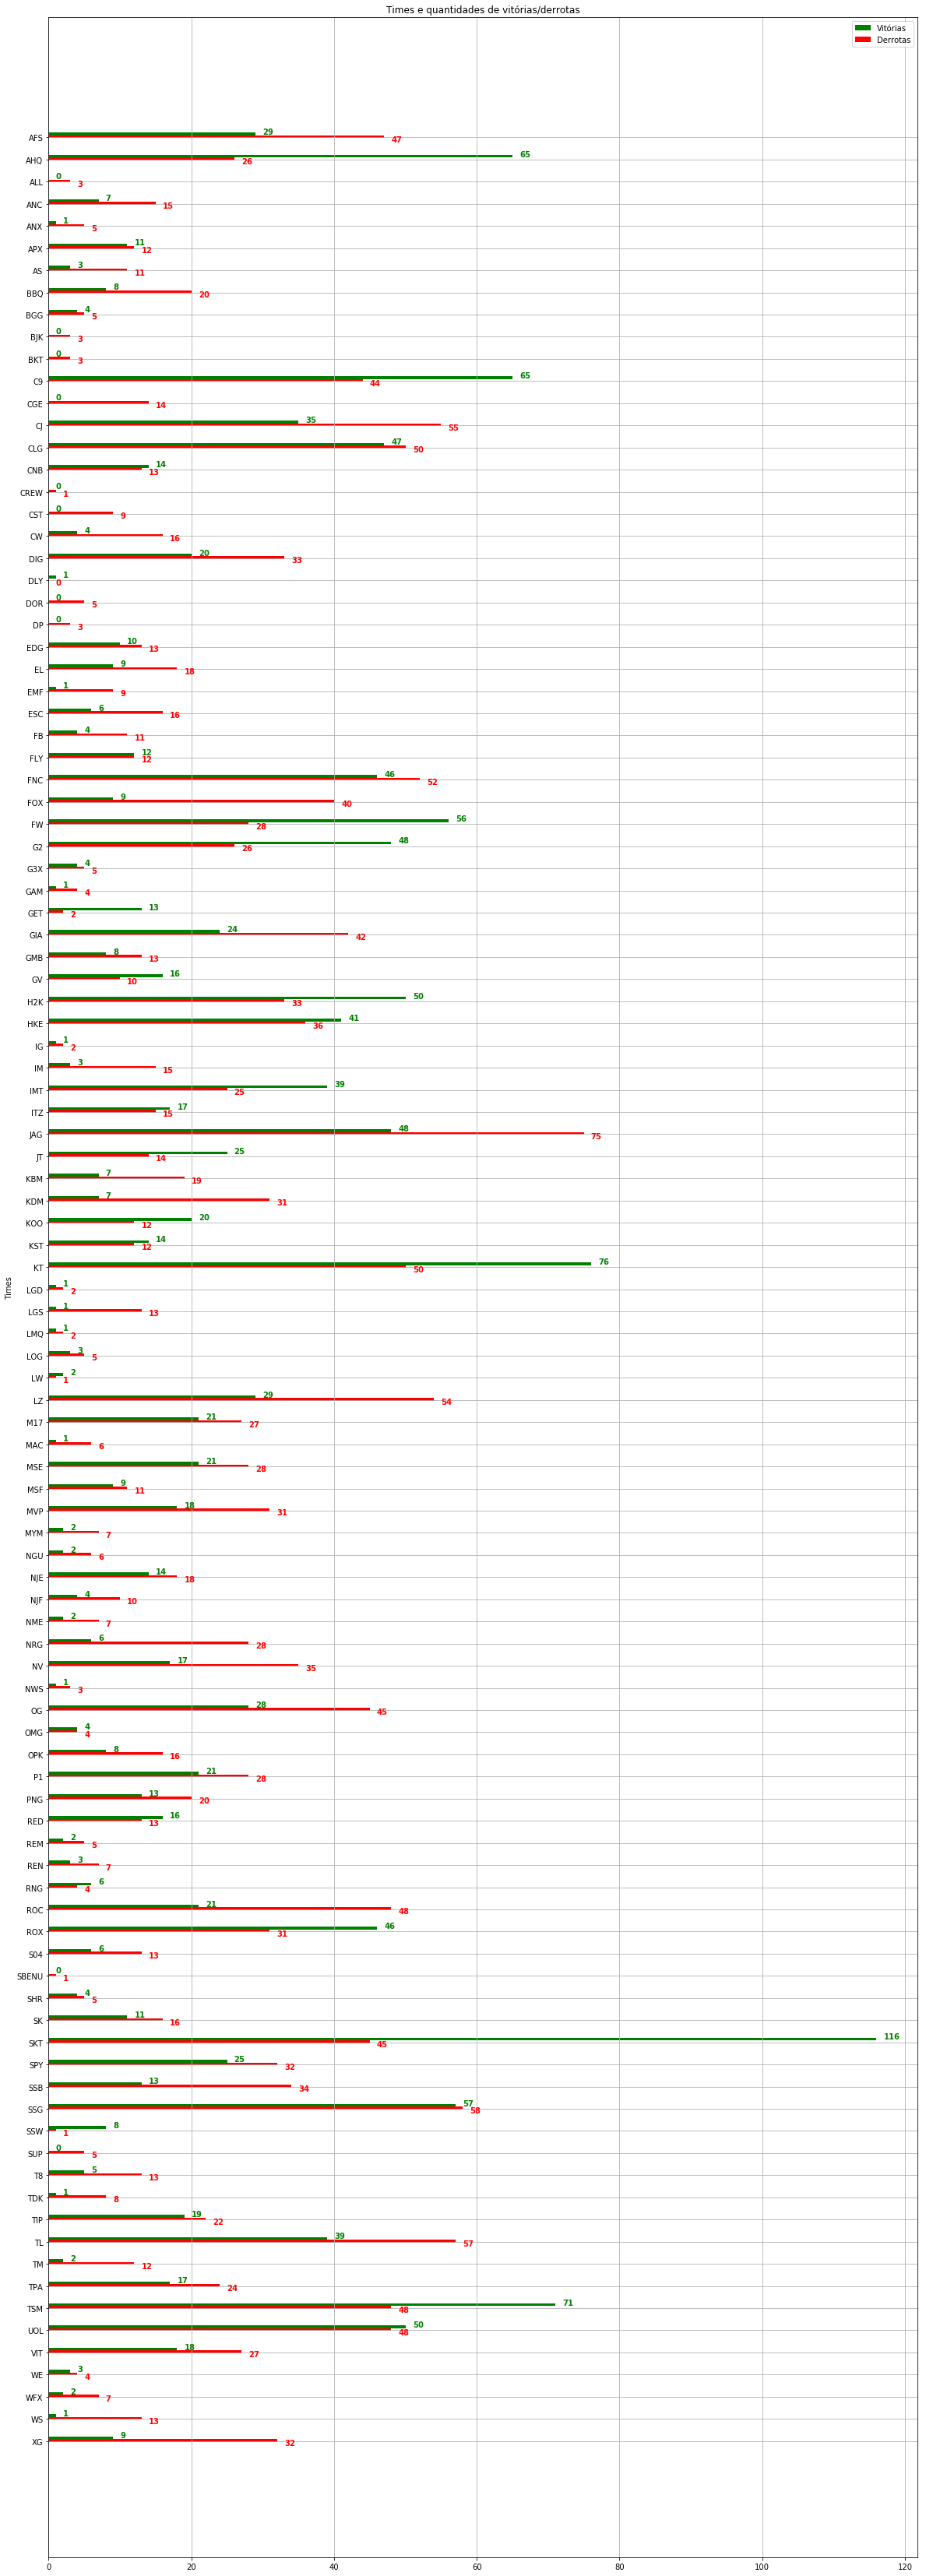

In [16]:
n = len(dic)
ind = np.arange(n)
width = 0.12

index= []
w = []
l = []
for i, (key, val) in enumerate(dic.items()):
    index.append(key)
    w.append(val[0])
    l.append(val[1])
    
fig = plt.figure(figsize=(20,60))
ax = fig.add_subplot(111)

rects1 = ax.barh(ind, w, width, color='g')
rects2 = ax.barh(ind+width, l, width, color='r')

ax.set_ylabel("Times")
ax.set_yticks(ind+width+0.03)
ax.set_yticklabels(index)
for i, v in enumerate(w):
    ax.text(v + 1, i, str(v), color='g', fontweight='bold')
for i, v in enumerate(l):
    ax.text(v + 1, i + .34, str(v), color='r', fontweight='bold')
ax.invert_yaxis()
ax.legend( (rects1[0], rects2[0]), ("Vitórias", "Derrotas") )

plt.grid()
plt.title("Times e quantidades de vitórias/derrotas")
plt.show()

In [17]:
def qnt(obj):
    lobj = []
    u = 0
    while u < len(df):
        bt = df[obj][u]
        if bt == "[]":
            lobj.append(0)
            u += 1
            continue
        bt = bt.replace("[", "")
        bt = bt.replace("]", "")
        bt = bt.split(",")
        lobj.append(len(bt))
        u += 1
    return lobj

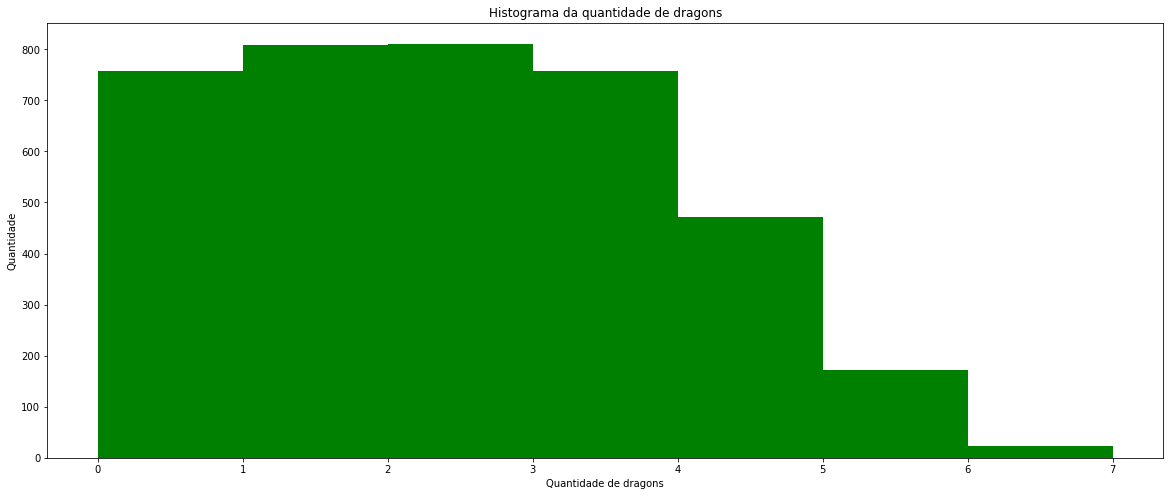

In [18]:
bins = np.linspace(0, 7, 8)
plt.figure(figsize=(20,8))
plt.hist(qnt("rDragons"), bins, color="g");
plt.title("Histograma da quantidade de dragons");
plt.xlabel("Quantidade de dragons");
plt.ylabel("Quantidade");

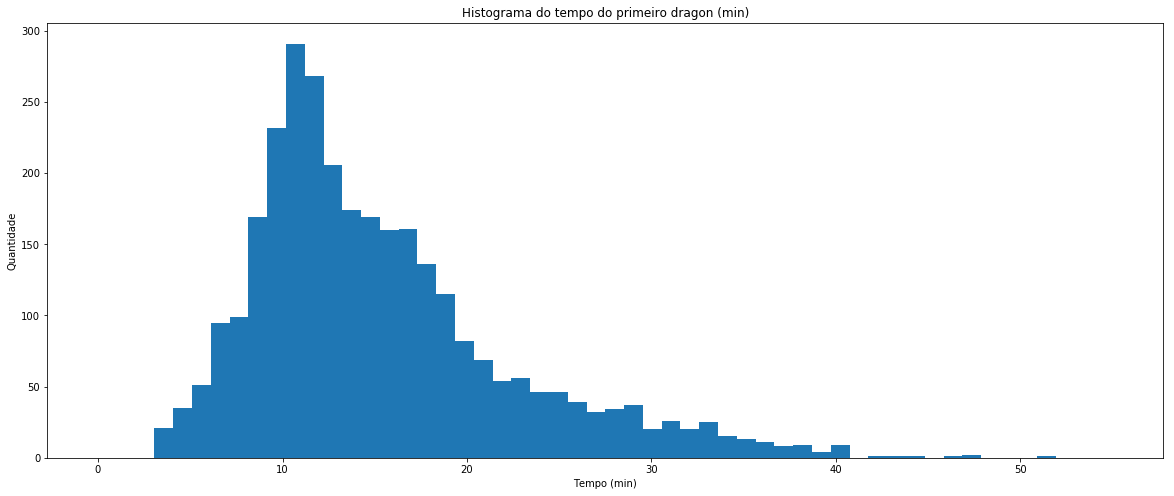

In [19]:
tdr = []
for i in range(len(df)):
    b = 99
    bt = df["rDragons"][i]
    if bt == "[]":
        continue
    bt = bt.replace("[", "")
    bt = bt.replace("]", "")
    bt = bt.split(",")
    a = map(float,bt)
    for j in a:
        if j < b:
            b = j
    tdr.append(b)

bins = np.linspace(0, 55, 55)
plt.figure(figsize=(20,8))
plt.hist(tdr, bins);
plt.title("Histograma do tempo do primeiro dragon (min)");
plt.xlabel("Tempo (min)");
plt.ylabel("Quantidade");

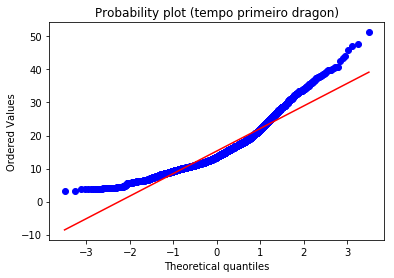

In [20]:
stats.probplot(tdr, dist='norm', plot=plt);
plt.title("Probability plot (tempo primeiro dragon)")
tdr= []

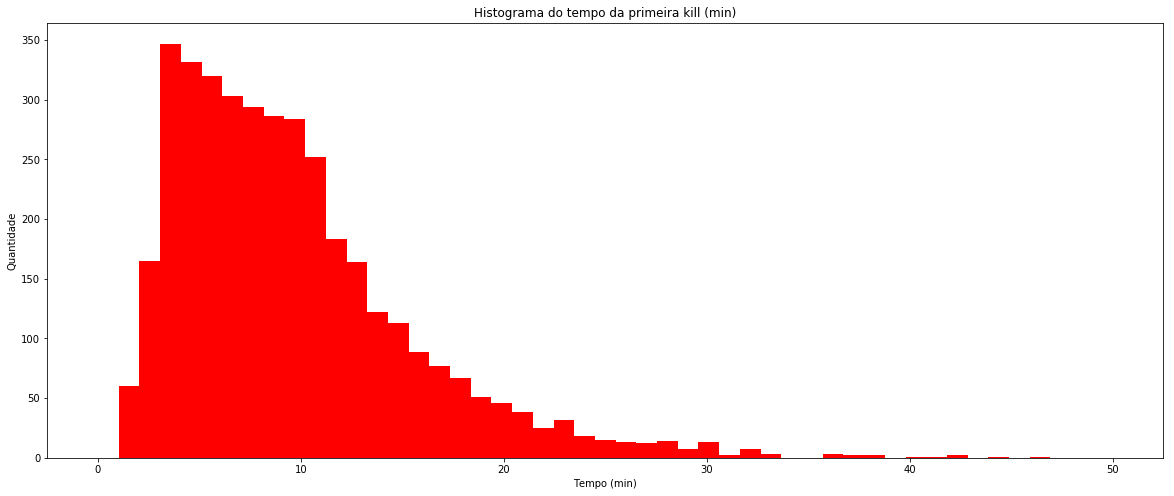

In [21]:
tkr = []
for i in range(len(df)):
    la = []
    b = 0
    bt = df["rKills"][i]
    if bt == "[[]]":
        continue
    bt = bt.replace("[", "")
    bt = bt.replace("]", "")
    bt = bt.replace(" ", "")
    bt = bt.split(",")
    for j in bt:
        j = j.replace("[", "")
        j = j.replace("]", "")
        j = j.replace(" ", "")
        j = j.split(",")
        la.append(j)
    tkr.append(float(la[0][0]))
    
bins = np.linspace(0, 50, 50)
plt.figure(figsize=(20,8))
plt.hist(tkr, bins, color="r");
plt.title("Histograma do tempo da primeira kill (min)");
plt.xlabel("Tempo (min)");
plt.ylabel("Quantidade");

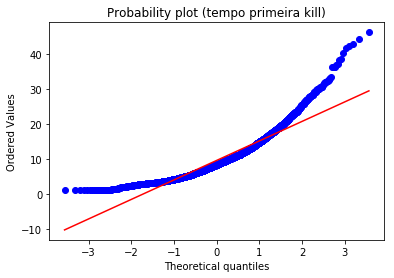

In [22]:
stats.probplot(tkr, dist='norm', plot=plt);
plt.title("Probability plot (tempo primeira kill)")
tkr= []

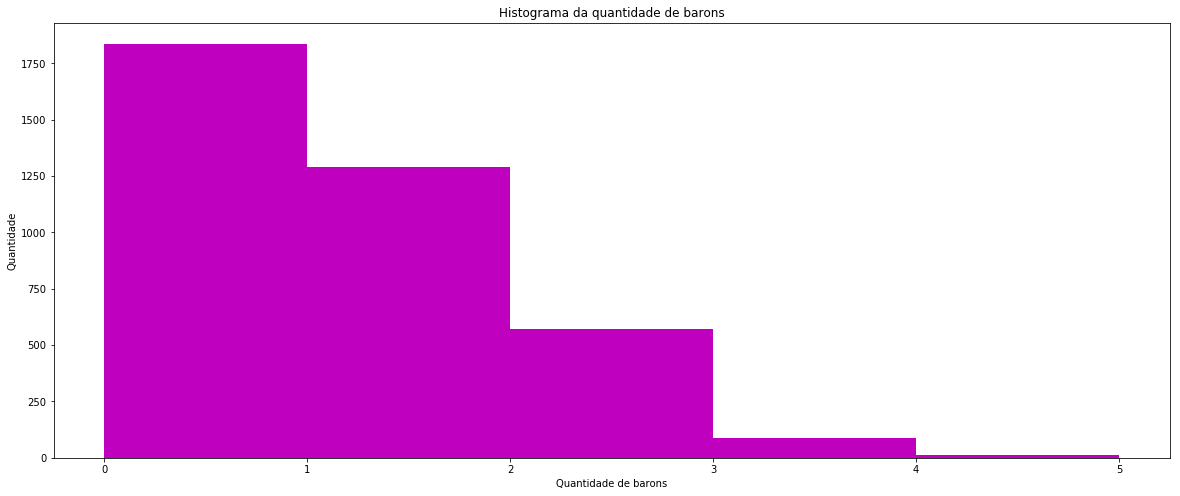

In [23]:
bins = np.linspace(0, 5, 6)
plt.figure(figsize=(20,8))
plt.hist(qnt("rBarons"), bins, color="m");
plt.title("Histograma da quantidade de barons");
plt.xlabel("Quantidade de barons");
plt.ylabel("Quantidade");

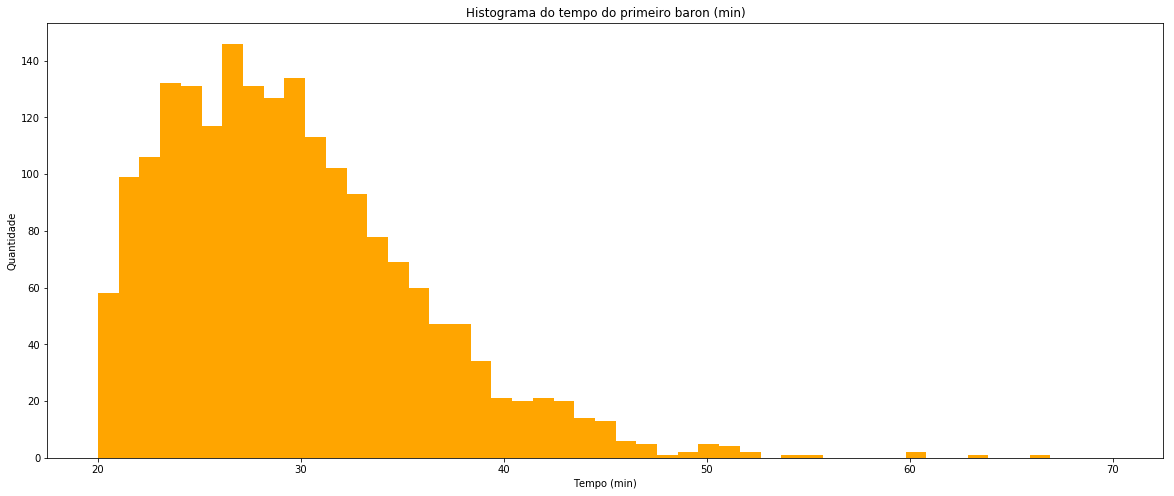

In [24]:
ttr = []

for i in range(len(df)):
    b = 99
    bt = df["rBarons"][i]
    if bt == "[]":
        continue
    bt = bt.replace("[", "")
    bt = bt.replace("]", "")
    bt = bt.split(",")
    a = map(float,bt)
    for j in a:
        if j < b:
            b = j
    ttr.append(b)
    
bins = np.linspace(20, 70, 50)
plt.figure(figsize=(20,8))
plt.hist(ttr, bins, color="orange");
plt.title("Histograma do tempo do primeiro baron (min)");
plt.xlabel("Tempo (min)");
plt.ylabel("Quantidade");

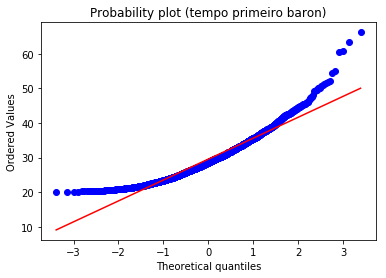

In [25]:
stats.probplot(ttr, dist='norm', plot=plt);
plt.title("Probability plot (tempo primeiro baron)")
ttr= []

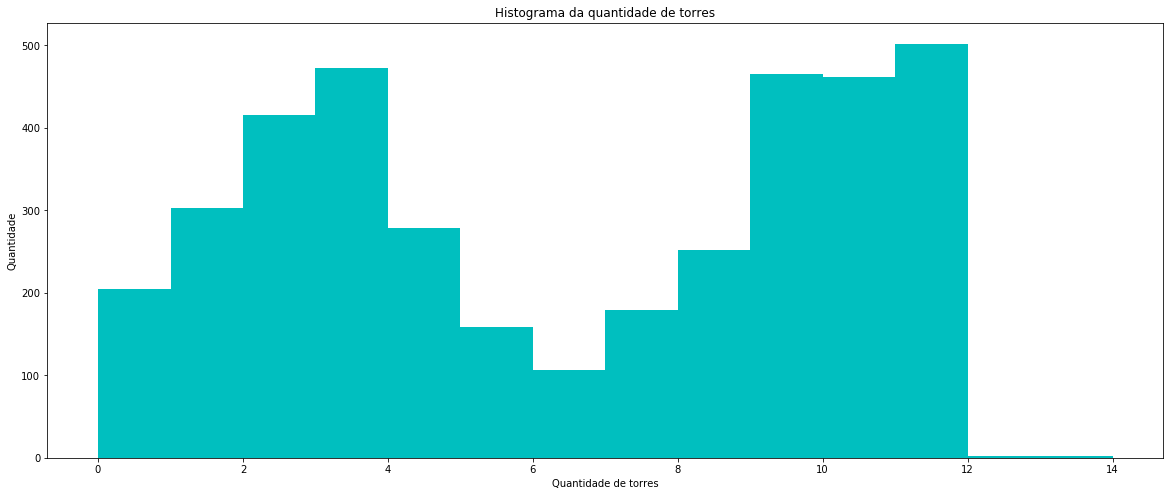

In [26]:
bins = np.linspace(0, 14, 15)
plt.figure(figsize=(20,8))
plt.hist(qnt("rTowers"), bins, color="c");
plt.title("Histograma da quantidade de torres");
plt.xlabel("Quantidade de torres");
plt.ylabel("Quantidade");

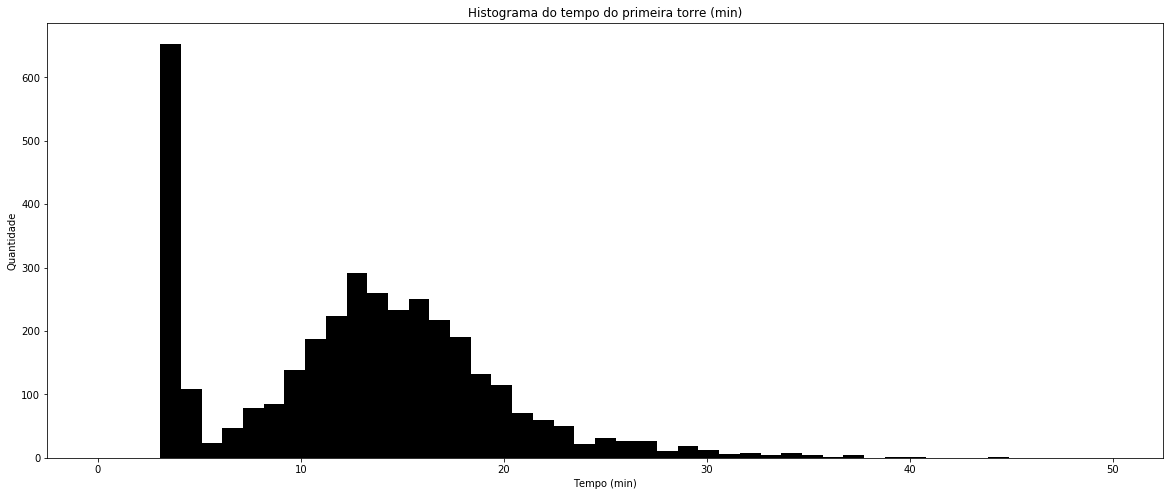

In [27]:
ttr = []

for i in range(len(df)):
    b = 99
    bt = df["rTowers"][i]
    if bt == "[]":
        continue
    bt = bt.replace("[", "")
    bt = bt.replace("]", "")
    bt = bt.split(",")
    a = map(float,bt)
    for j in a:
        if j < b:
            b = j
    ttr.append(b)
    
bins = np.linspace(0, 50, 50)
plt.figure(figsize=(20,8))
plt.hist(ttr, bins, color="k");
plt.title("Histograma do tempo do primeira torre (min)");
plt.xlabel("Tempo (min)");
plt.ylabel("Quantidade");

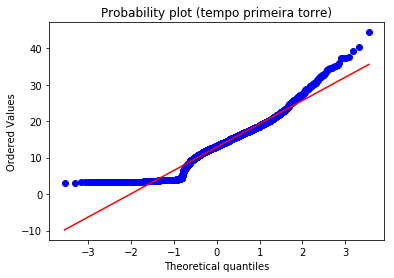

In [28]:
stats.probplot(ttr, dist='norm', plot=plt);
plt.title("Probability plot (tempo primeira torre)")
ttr= []

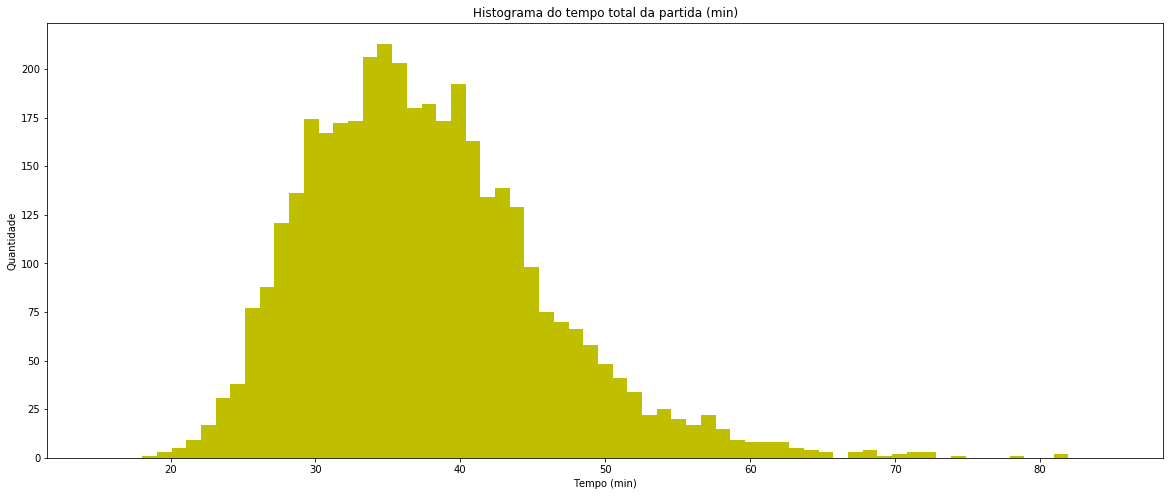

In [29]:
la2 = []
for j in df["gamelength"]:
    la2.append(j)

bins = np.linspace(15, 85, 70)
plt.figure(figsize=(20,8))
plt.hist(la2, bins, color="y");
plt.title("Histograma do tempo total da partida (min)");
plt.xlabel("Tempo (min)");
plt.ylabel("Quantidade");

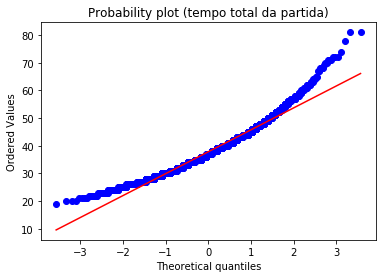

In [30]:
stats.probplot(la2, dist='norm', plot=plt);
plt.title("Probability plot (tempo total da partida)")
la2= []

# 2 - Relação entre variáveis (regressão linear)
### Considerando os dados do time Vermelho semelhante aos do time Azul

In [31]:
def dragon_tower(dragon, torre):
    ttr = []
    tdr = []

    for i in range(len(df)):
        b = 99
        bt = df[torre][i]
        if bt == "[]":
            b = 0
            ttr.append(0)
            continue
        bt = bt.replace("[", "")
        bt = bt.replace("]", "")
        bt = bt.split(",")
        a = map(float,bt)
        for j in a:
            if j < b:
                b = j
        ttr.append(b)

    for i in range(len(df)):
        b = 99
        bt = df[dragon][i]
        if bt == "[]":
            b = 0
            tdr.append(b)
            continue
        bt = bt.replace("[", "")
        bt = bt.replace("]", "")
        bt = bt.split(",")
        a = map(float,bt)
        for j in a:
            if j < b:
                b = j
        tdr.append(b)

    u = 0
    while u < len(ttr):
        if ttr[u] == 0:
            del(ttr[u])
            del(tdr[u])
            continue
        elif tdr[u] == 0:
            del(ttr[u])
            del(tdr[u])
            continue
        u += 1
    return tdr, ttr

## 2.1.1 Relação entre os tempos do primeiro dragon e a primeira torre do para o time Vermelho

In [32]:
X1, Y1 = dragon_tower("rDragons", "rTowers")
x1 = X1
X1 = sm.add_constant(X1)
model = sm.OLS(Y1,X1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     97.93
Date:                Sat, 09 Dec 2017   Prob (F-statistic):           9.70e-23
Time:                        12:36:49   Log-Likelihood:                -9713.4
No. Observations:                2978   AIC:                         1.943e+04
Df Residuals:                    2976   BIC:                         1.944e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         10.1497      0.274     37.047      0.0

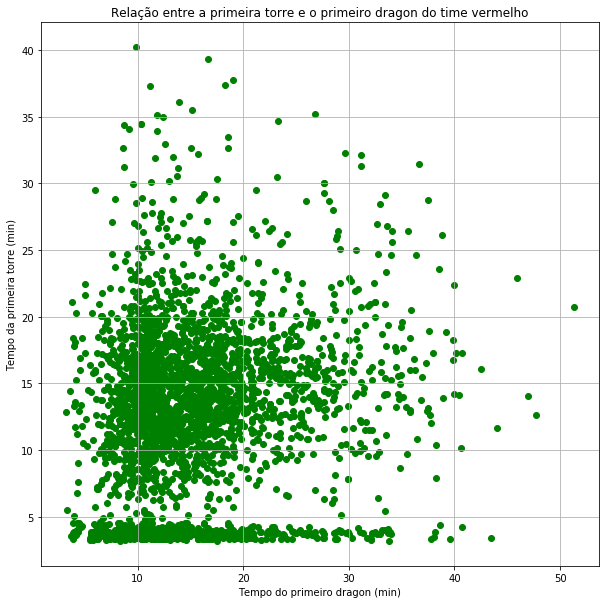

In [33]:
plt.figure(figsize=(10,10))
plt.scatter(x1,Y1,color="g")
plt.title("Relação entre a primeira torre e o primeiro dragon do time vermelho")
plt.grid()
plt.xlabel("Tempo do primeiro dragon (min)")
plt.ylabel("Tempo da primeira torre (min)")
plt.show()

### Sabendo que o coeficiente de determinação (R-squared) do item 2.1.1 é 3,2%, é possivel concluir que a relação entre a variável de tempo da primeira torre e de tempo do primeiro dragon é baixa.

## 2.1.2 Relação entre os tempos do primeiro dragon para o time Vermelho e a primeira torre do para o time Azul

In [34]:
X2, Y2 = dragon_tower("rDragons", "bTowers")
x2 = X2
X2 = sm.add_constant(X2)
model = sm.OLS(Y2,X2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     29.63
Date:                Sat, 09 Dec 2017   Prob (F-statistic):           5.66e-08
Time:                        12:36:49   Log-Likelihood:                -9622.5
No. Observations:                2945   AIC:                         1.925e+04
Df Residuals:                    2943   BIC:                         1.926e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         11.2788      0.277     40.764      0.0

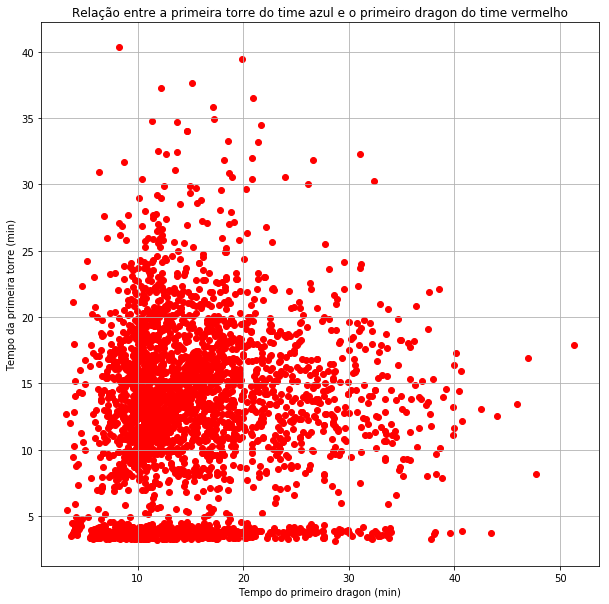

In [35]:
plt.figure(figsize=(10,10))
plt.scatter(x2,Y2,color="r")
plt.title("Relação entre a primeira torre do time azul e o primeiro dragon do time vermelho")
plt.grid()
plt.xlabel("Tempo do primeiro dragon (min)")
plt.ylabel("Tempo da primeira torre (min)")
plt.show()

### Sabendo que o coeficiente de determinação (R-squared) entre os tempos do primeiro dragon para o time Vermelho e a primeira torre para o time Azul (item 2.1.2) é 1%, é possivel concluir que a essas variáveis estão muito pouco relacionadas.

In [36]:
def kill_dragon(kill, dragon):
    tkr = []
    tdr3 = []


    for i in range(len(df)):
        la = []
        b = 0
        bt = df[kill][i]
        if bt == "[[]]":            
            tkr.append(b)
            continue
        bt = bt.replace("[", "")
        bt = bt.replace("]", "")
        bt = bt.replace(" ", "")
        bt = bt.split(",")
        for j in bt:
            j = j.replace("[", "")
            j = j.replace("]", "")
            j = j.replace(" ", "")
            j = j.split(",")
            la.append(j)
        tkr.append(float(la[0][0]))

    for i in range(len(df)):
        b = 99
        bt = df[dragon][i]
        if bt == "[]":
            b = 0
            tdr3.append(b)
            continue
        bt = bt.replace("[", "")
        bt = bt.replace("]", "")
        bt = bt.replace(" ", "")
        bt = bt.split(",")
        a = list(map(float,bt))
        for j in a:
            if j < b:
                b = j
        tdr3.append(b)

    u = 0
    while u < len(tkr):
        if tkr[u] == 0:
            del(tkr[u])
            del(tdr3[u])
            continue
        elif tdr3[u] == 0:
            del(tkr[u])
            del(tdr3[u])
            continue
        u += 1
        
    return tkr,tdr3

## 2.2.1 Relação entre os tempos da primeira kill e o primeiro dragon, do time Vermelho 

In [37]:
X3, Y3 = kill_dragon("rKills", "rDragons")
x3 = X3
X3 = sm.add_constant(X3)
model = sm.OLS(Y3,X3)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     8.850
Date:                Sat, 09 Dec 2017   Prob (F-statistic):            0.00295
Time:                        12:36:50   Log-Likelihood:                -10234.
No. Observations:                3027   AIC:                         2.047e+04
Df Residuals:                    3025   BIC:                         2.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         14.6986      0.243     60.479      0.0

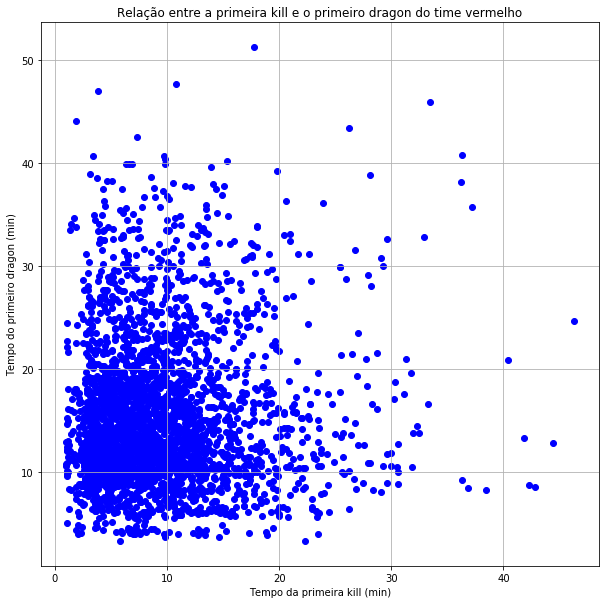

In [38]:
plt.figure(figsize=(10,10))
plt.scatter(x3,Y3,color="b")
plt.title("Relação entre a primeira kill e o primeiro dragon do time vermelho")
plt.grid()
plt.ylabel("Tempo do primeiro dragon (min)")
plt.xlabel("Tempo da primeira kill (min)")
plt.show()

### Anasilsando-se o coeficiente de determinação entre os tempo da primeira kill e o primeiro dragon para o time Vermelho, cujo valor é de 0,3%, é possível concluir que essas duas variáveis quase não estão relacionadas.

## 2.2.2 Relação entre os tempos da primeira kill para o time Azul e o primeiro dragon para o time Vermelho

In [39]:
X4, Y4 = kill_dragon("bKills", "rDragons")
x4 = X4
X4 = sm.add_constant(X4)
model = sm.OLS(Y4,X4)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     19.48
Date:                Sat, 09 Dec 2017   Prob (F-statistic):           1.05e-05
Time:                        12:36:50   Log-Likelihood:                -10238.
No. Observations:                3029   AIC:                         2.048e+04
Df Residuals:                    3027   BIC:                         2.049e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         16.2483      0.248     65.560      0.0

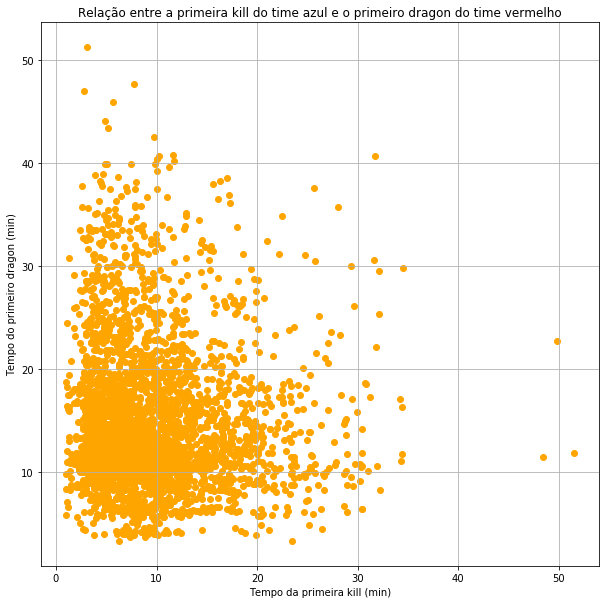

In [40]:
plt.figure(figsize=(10,10))
plt.scatter(x4,Y4,color="orange")
plt.title("Relação entre a primeira kill do time azul e o primeiro dragon do time vermelho")
plt.grid()
plt.ylabel("Tempo do primeiro dragon (min)")
plt.xlabel("Tempo da primeira kill (min)")
plt.show()

### Anasilsando-se o coeficiente de determinação entre os tempo da primeira kill para o time Azul e o primeiro dragon para o time Vermelho, cujo valor é de 0,6%, é possível concluir que essas duas variáveis quase não estão relacionadas.

In [41]:
def dragon_baron(dragon, baron):
    ttr = []
    tdr = []

    for i in range(len(df)):
        b = 99
        bt = df[baron][i]
        if bt == "[]":
            b = 0
            ttr.append(0)
            continue
        bt = bt.replace("[", "")
        bt = bt.replace("]", "")
        bt = bt.split(",")
        a = map(float,bt)
        for j in a:
            if j < b:
                b = j
        ttr.append(b)

    for i in range(len(df)):
        b = 99
        bt = df[dragon][i]
        if bt == "[]":
            b = 0
            tdr.append(b)
            continue
        bt = bt.replace("[", "")
        bt = bt.replace("]", "")
        bt = bt.split(",")
        a = map(float,bt)
        for j in a:
            if j < b:
                b = j
        tdr.append(b)

    u = 0
    while u < len(ttr):
        if ttr[u] == 0:
            del(ttr[u])
            del(tdr[u])
            continue
        elif tdr[u] == 0:
            del(ttr[u])
            del(tdr[u])
            continue
        u += 1
    return tdr, ttr

## 2.3 Relação entre os tempos do primeiro Dragon e do primeiro Baron para o time Azul

In [42]:
X5, Y5 = dragon_baron("bDragons", "bBarons")
x5 = X5
X5 = sm.add_constant(X5)
model = sm.OLS(Y5,X5)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     49.05
Date:                Sat, 09 Dec 2017   Prob (F-statistic):           3.37e-12
Time:                        12:36:51   Log-Likelihood:                -6683.4
No. Observations:                2068   AIC:                         1.337e+04
Df Residuals:                    2066   BIC:                         1.338e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         27.5936      0.330     83.593      0.0

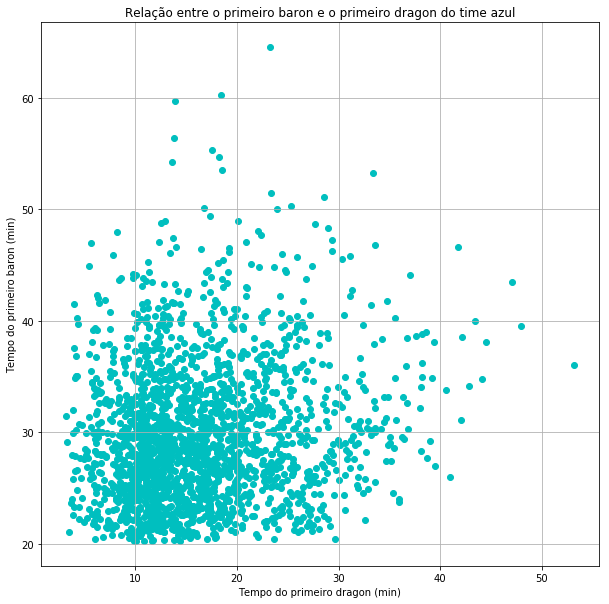

In [43]:
plt.figure(figsize=(10,10))
plt.scatter(x5,Y5,color="c")
plt.title("Relação entre o primeiro baron e o primeiro dragon do time azul")
plt.grid()
plt.xlabel("Tempo do primeiro dragon (min)")
plt.ylabel("Tempo do primeiro baron (min)")
plt.show()

### Sabendo que o coeficiente de determinação (R-squared) do item 2.3 é 2,3%, é possivel concluir que a relação entre a variável de tempo do primeiro dragon e do primeiro baron é baixa.

## 2.4 Relação entre o tempo da partida e a quantidade de kills para o time Azul

In [44]:
def glen_tkill():
    llen = []
    la2 = []
    lu = []
    for j in df["gamelength"]:
        la2.append(j)
    u = 0
    while u < len(la2):
        bt = df["bKills"][u]
        if bt == "[]":
            lu.append(u)
            u += 1
            continue
        bt = bt.replace("[", "")
        bt = bt.replace("]", "")
        bt = bt.split(",")
        llen.append(len(bt))
        u += 1
    for h in reversed(lu):
        del(la2[h])
    return llen, la2

In [45]:
X52, Y52 = glen_tkill()
x52 = X52
X52 = sm.add_constant(X52)
model = sm.OLS(Y52,X52)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     156.9
Date:                Sat, 09 Dec 2017   Prob (F-statistic):           2.68e-35
Time:                        12:36:51   Log-Likelihood:                -13260.
No. Observations:                3802   AIC:                         2.652e+04
Df Residuals:                    3800   BIC:                         2.654e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         34.7721      0.276    126.159      0.0

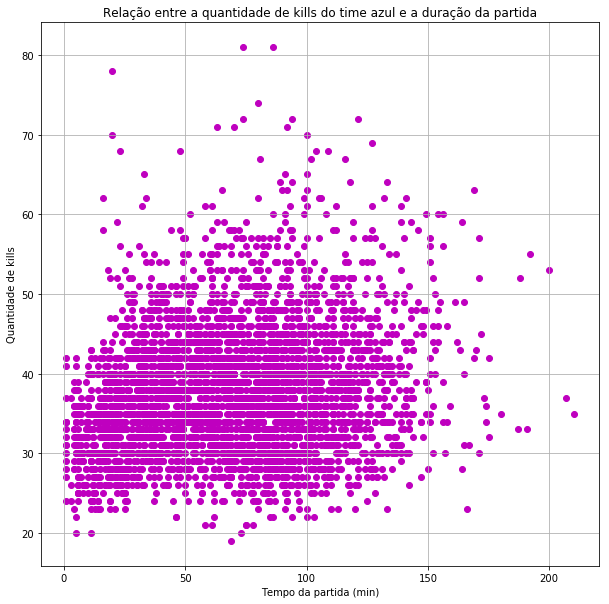

In [46]:
plt.figure(figsize=(10,10))
plt.scatter(x52,Y52,color="m")
plt.title("Relação entre a quantidade de kills do time azul e a duração da partida")
plt.grid()
plt.ylabel("Quantidade de kills")
plt.xlabel("Tempo da partida (min)")
plt.show()

# Conclusão 2

### Entre as análises feitas entre diferentes variáveis, as que mais são relacionadas são o tempo de jogo e a quantidade de kills (0,04); o tempo do primeiro dragon e o tempo da primeira torre (0,032); e o tempo do primeiro dragon e o tempo do primeiro baron. Entretanto, todas as relações são ligeiramente baixas.

# 3 - Relação entre variáveis e a vitória/derrota (regressão logistica)
### Considerando os dados do time Vermelho semelhante aos do time Azul

In [47]:
def g(min):
    lg = []
    la2 = []
    lu = []
    for j in df["bResult"]:
        la2.append(j)
    for i in range(len(la2)):
        la = df["golddiff"][i]
        la = ast.literal_eval(la)
        if len(la) < min:
            lu.append(i)
            i += 1
            continue
        lg.append(la[min-1])
        i += 1
    for h in reversed(lu):
        del(la2[h])
    lg = list(map(float, lg))
    
    return la2, lg

## 3.1.1 Relação entre a vantegem de ouro para o time Azul as 10 minutos e o resultado

In [48]:
X6,Y6 = g(10)
model = sm.Logit(X6, Y6)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.607261
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3802
Model:                          Logit   Df Residuals:                     3801
Method:                           MLE   Df Model:                            0
Date:                Sat, 09 Dec 2017   Pseudo R-squ.:                  0.1187
Time:                        12:36:52   Log-Likelihood:                -2308.8
converged:                       True   LL-Null:                       -2619.8
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0009   4.11e-05     22.098      0.000         0.001     0.001


### O coeficiente de determinação com um valor de 0,118 (11,8%) indica que há uma relação considerável entre a vantagem de ouro e o resultado da partida

## 3.1.2 Relação entre a vantegem de ouro para o time Azul as 20 minutos e o resultado

In [49]:
X7,Y7 = g(20)
model = sm.Logit(X7,Y7)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.473857
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3801
Model:                          Logit   Df Residuals:                     3800
Method:                           MLE   Df Model:                            0
Date:                Sat, 09 Dec 2017   Pseudo R-squ.:                  0.3123
Time:                        12:36:53   Log-Likelihood:                -1801.1
converged:                       True   LL-Null:                       -2619.2
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0005   1.74e-05     29.747      0.000         0.000     0.001


### O coeficiente de determinação com um valor de 0,312 (31,2%) ratifica a afirmação feita no item 3.1.1. Pórem, há uma relação maior ao 20 minutos entre essas duas variáveis.

## 3.1.3 Relação entre a vantegem de ouro para o time Azul as 30 minutos e o resultado

In [50]:
X72,Y72 = g(30)
model = sm.Logit(X72,Y72)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.361056
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3276
Model:                          Logit   Df Residuals:                     3275
Method:                           MLE   Df Model:                            0
Date:                Sat, 09 Dec 2017   Pseudo R-squ.:                  0.4773
Time:                        12:36:54   Log-Likelihood:                -1182.8
converged:                       True   LL-Null:                       -2262.8
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0004   1.37e-05     29.125      0.000         0.000     0.000


### O coeficiente de determinação com um valor de 0,477 (47,7%) indica que, aos 30 minutos, há uma grande relação entre a vantagem de ouro e o resultado de jogo.

## 3.1.4 Relação entre a vantegem de ouro para o time Azul as 40 minutos e o resultado

In [51]:
X73,Y73 = g(40)
model = sm.Logit(X73,Y73)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.423853
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1433
Model:                          Logit   Df Residuals:                     1432
Method:                           MLE   Df Model:                            0
Date:                Sat, 09 Dec 2017   Pseudo R-squ.:                  0.3880
Time:                        12:36:54   Log-Likelihood:                -607.38
converged:                       True   LL-Null:                       -992.44
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0003   1.41e-05     19.704      0.000         0.000     0.000


### O coeficiente de determinação com um valor de 0,388 (38,8%) demonstra que, a partir de um certo ponto após os 30 minutos de jogo, a relação entre a vantaegm de ouro e o resultado começa a se reduzir.

## 3.2 Relação entre a quantidade de Dragons para o time Azul e o resultado

In [52]:
Y8 = qnt("bDragons")
model = sm.Logit(df["bResult"],Y8)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.609711
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                bResult   No. Observations:                 3802
Model:                          Logit   Df Residuals:                     3801
Method:                           MLE   Df Model:                            0
Date:                Sat, 09 Dec 2017   Pseudo R-squ.:                  0.1151
Time:                        12:36:55   Log-Likelihood:                -2318.1
converged:                       True   LL-Null:                       -2619.8
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.3669      0.016     22.943      0.000         0.336     0.398


### O coeficiente de determinação entre a quantidade de Dragons e o resultado da partida é de 0,115 (11,5%). Isso significa que as duas variáveis estão um pouco relacionadas.

## 3.3 Relação entre a quantidade de Barons para o time Azul e o resultado

In [53]:
Y9 = qnt("bBarons")
model = sm.Logit(df["bResult"],Y9)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.560716
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                bResult   No. Observations:                 3802
Model:                          Logit   Df Residuals:                     3801
Method:                           MLE   Df Model:                            0
Date:                Sat, 09 Dec 2017   Pseudo R-squ.:                  0.1862
Time:                        12:36:55   Log-Likelihood:                -2131.8
converged:                       True   LL-Null:                       -2619.8
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.2428      0.048     25.817      0.000         1.148     1.337


### O coeficiente de determinação entre a quantidade de Barons e o resultado da partida é de 0,186 (18,6%). Isso significa que as duas variáveis estão consideravelmente relacionadas, mais do que a quantidade de Dragons e o resultado da partida.

## 3.4 Relação entre a quantidade de Torres para o time Azul e o resultado

In [54]:
Y10 = qnt("bTowers")
model = sm.Logit(df["bResult"],Y10)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.566992
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                bResult   No. Observations:                 3802
Model:                          Logit   Df Residuals:                     3801
Method:                           MLE   Df Model:                            0
Date:                Sat, 09 Dec 2017   Pseudo R-squ.:                  0.1771
Time:                        12:36:55   Log-Likelihood:                -2155.7
converged:                       True   LL-Null:                       -2619.8
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.1464      0.005     27.691      0.000         0.136     0.157


### Sabendo que o coeficiente de determinação é 0,177 (17,7%), é possivel concluir que a relação entre a variável de quantidades de torres e o resultado é razoável.


## 3.5 Relação entre a quantidade de Kills para o time Azul e o resultado

In [55]:
Y11 = qnt("bKills")
model = sm.Logit(df["bResult"],Y11)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.617333
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                bResult   No. Observations:                 3802
Model:                          Logit   Df Residuals:                     3801
Method:                           MLE   Df Model:                            0
Date:                Sat, 09 Dec 2017   Pseudo R-squ.:                  0.1041
Time:                        12:36:55   Log-Likelihood:                -2347.1
converged:                       True   LL-Null:                       -2619.8
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0107      0.000     22.355      0.000         0.010     0.012


### Sabendo que o coeficiente de determinação é 0,104 (10,4%), é possivel considerar a relação entre a quantidade de kill e o resultado como baixa.

## 3.6 Relação entre o Arauto para o time Azul e o resultado

In [56]:
Y12 = qnt("bHeralds")
model = sm.Logit(df["bResult"],Y12)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.677384
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                bResult   No. Observations:                 3802
Model:                          Logit   Df Residuals:                     3801
Method:                           MLE   Df Model:                            0
Date:                Sat, 09 Dec 2017   Pseudo R-squ.:                 0.01693
Time:                        12:36:55   Log-Likelihood:                -2575.4
converged:                       True   LL-Null:                       -2619.8
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.6644      0.065     10.260      0.000         0.537     0.791


### O coeficiente de determinação entre o Arauto e o resultado é de 0,016 (1,6%), ou seja, a relação entre as variáveis é bem baixa.

# Conclusão 3
### As regressões logísticas feitas mostram que a vantagem de ouro é ligeiramente influente no resultado da partida. Sua influência é crescente até aproximadamente 30 minutos (0,477). Após um certo pico, a influência da vantagem de ouro começa a decrescer (como visto na comparação entre os itens 3.1.3 e 3.1.4).
### A influência da quantidade de barons sobre o resultado (0,186) é maior que a influência da quantidade de dragons sobre o mesmo (0,115).
### Já a quantidade de torres e a quantidade de kills também têm uma influência considerável sobre o resultado, com o valor de coeficiente de determinação 0,177 e 0,104 respectivamente.
### Por fim, o arauto tem pouquissima influência sobre o resultado, com um coeficiente de determinaçaõ de 0,016.


# 4 - SVC (Support Vector Classification) e Machine Learning
### Relacionando os dados de número de Dragons e Barons de cada partida com o resultado da mesma através das funções SVM e SVC da biblioteca sklearn
### Para realizar essa relação, foi implementada uma função de machine learning treinada com o dataset das partidas entre 2015 e 2017 ao redor do mundo

In [57]:
dragb = []

for i in range(len(df)):
    db = df["bDragons"][i]
    if db == "[]":
        dragb.append(0)
        continue
    db = db.replace("[", "")
    db = db.replace("]", "")
    db = db.split(",")
    dragb.append(len(db))
        

baronb = []

for i in range(len(df)):
    bb = df["bBarons"][i]
    if bb == "[]":
        baronb.append(0)
        continue
    bb = bb.replace("[", "")
    bb = bb.replace("]", "")
    bb = bb.split(",")
    baronb.append(len(bb))


#Dados para controle
p = len(df)
u = 2*(p-1)/3

C1 = []
C2 = []

j=0
while j < u:
    C1.append([dragb[j],baronb[j]])
    C2.append(df['bResult'][j])
    j+=1

#Dados para teste
T1 = []
T2 = []

h = 2534
while h < len(df):
    T1.append([dragb[h],baronb[h]])
    T2.append(df['bResult'][h])
    h+=1

In [58]:
#import da função de machine learning
from sklearn import *

clf = svm.SVC(kernel='rbf', C=1, gamma=1).fit(C1, C2)

p = clf.predict(T1)
print('Taxa de precisão do classificador com base no dataframe dividido em controle e teste: {}%'.format(100*clf.score(T1, T2)))

c:\users\liuseeker\anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\users\liuseeker\anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
c:\users\liuseeker\anaconda3\lib\site-packages\sklearn\lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
c:\users\

Taxa de precisão do classificador com base no dataframe dividido em controle e teste: 84.77917981072555%


In [59]:
C1 = np.array(C1)

L2 = []

for l in range(len(C2)):
    u = C2[l]
    if u == 1:
        L2.append('red')
    else:
        L2.append('blue')

In [60]:
#definição do plano onde as áreas de vitória / derrota serão plotadas
x_min, x_max = C1[:, 0].min() - 1, C1[:, 0].max() + 1
y_min, y_max = C1[:, 1].min() - 1, C1[:, 1].max() + 1
h = -(x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

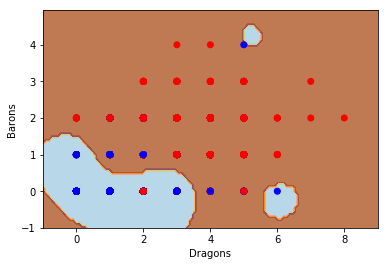

In [61]:
plt.subplot(1, 1, 1)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, c= L2, alpha=0.8)
plt.scatter(C1[:, 0], C1[:, 1], c=L2, cmap=plt.cm.Paired)
plt.xlim(x_min, x_max)
plt.xlabel('Dragons')
plt.ylabel('Barons')
plt.show()

In [62]:
# Resultados verdadeiros negativos, falsos positivos, falsos negativos e verdadeiros positivos
vn, fp, fn, vp = metrics.confusion_matrix(T2, p).ravel()

In [63]:
print("Verdadeiros negativos: {}".format(vn))
print("Falsos positivos: {}".format(fp))
print("Falsos negativos: {}".format(fn))
print("Verdadeiros positivos: {}".format(vp))

Verdadeiros negativos: 455
Falsos positivos: 109
Falsos negativos: 84
Verdadeiros positivos: 620


# Conclusão 4
### Ao usar o dataframe para treinar o algoritmo classificador e comparar os resultados com dados de teste, a função SVM se provou extremamente efetiva devido à sua taxa de precisão de classificação de aproximadamente 85% (0.847).
### A partir dos dados gerados pelo classificador foi possível extrair os valores verdadeiros negativos, falsos positivos,  falsos negativos e verdadeiros positivos (455, 109, 84 e 620, respectivamente) para um treino de 1268 partidas.